In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("seminars/S05/S05-hw-dataset.csv") # обращение к файлу

print(df.head())# вывод первых пяти значений
print(df.info())# просмотр информации о данных: количество строк, столбцов и их типы
print(df.describe())# вывод статистику по числовым данным (среднее, минимальное, максимальное...)
print(df['default'].value_counts(normalize=True))# распределёние целевого признака 'default' (кол-во 0 и 1)


   client_id  age  income  years_employed  credit_score  debt_to_income  \
0          1   25   94074              22           839        0.547339   
1          2   58   51884              26           565        0.290882   
2          3   53   48656              39           561        0.522340   
3          4   42   81492              30           582        0.709123   
4          5   42   94713               8           642        0.793392   

   num_credit_cards  num_late_payments  has_mortgage  has_car_loan  \
0                 1                  7             0             0   
1                 1                  1             0             1   
2                 1                 13             0             0   
3                 2                 10             1             1   
4                 3                  3             0             0   

   savings_balance  checking_balance  region_risk_score  \
0            26057              5229           0.080052   
1         

In [19]:
X = df.drop(columns=['client_id', 'default'])  # удалние 'client_id' и 'default'
y = df['default']  # распределёние таргета (баланса классов)


In [20]:
assert df['debt_to_income'].min() >= 0 and df['debt_to_income'].max() <= 1 # выполнение простой предобработки

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Разделение данных на обучающую и тестовую выборки
# Создание бейзлайн модель с DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Прогнозы и метрики
y_pred = dummy_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1])}")


Accuracy: 0.5893333333333334
ROC-AUC: 0.5


In [22]:
# Создание пайплайна с стандартизацией и логистической регрессией
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Подбор параметра C 
from sklearn.model_selection import GridSearchCV

param_grid = {'logreg__C': [0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best C: {grid_search.best_params_}")

# Оценка модели
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")


Best C: {'logreg__C': 0.01}
Accuracy: 0.7973333333333333
ROC-AUC: 0.8642754304519011


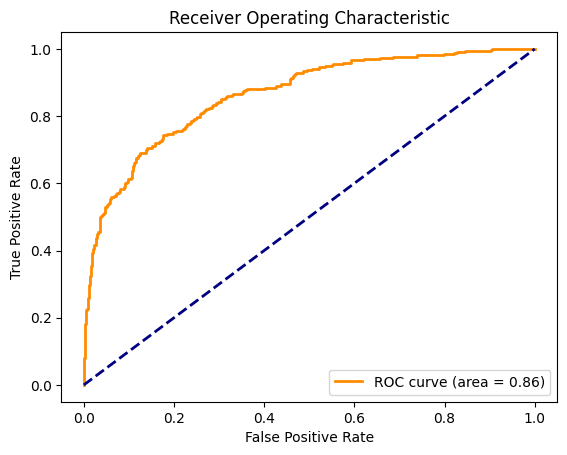

In [23]:
# Построение кривой по варианту ROC

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [27]:
# Сохранение графика в папку figures
plt.savefig("C://Users/PC/DPOIvK/homeworks/HW05/figures/graph.png")

# Показываем график
plt.show()

<Figure size 640x480 with 0 Axes>

In [28]:
dummy_accuracy = accuracy_score(y_test, dummy_clf.predict(X_test))
logreg_accuracy = accuracy_score(y_test, y_pred)
# Вывод результатов 
print(f"Бейзлайн модель (DummyClassifier) показала точность: {dummy_accuracy:.4f}")
print(f"Логистическая регрессия (LogisticRegression) показала точность: {logreg_accuracy:.4f}")


Бейзлайн модель (DummyClassifier) показала точность: 0.5893
Логистическая регрессия (LogisticRegression) показала точность: 0.7973
